<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/binary-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# binary Logistic Regression

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams.

In [0]:
def set_chart_theme(ax):
  dark_theme = False
  chart_face_color =  '#404040' if dark_theme else '#FFFFFF'
  chart_label_color =  '#FFFFFF' if dark_theme else '#000000'
  
  ax.set_facecolor(chart_face_color)
  ax.spines['bottom'].set_color(chart_label_color)
  ax.spines['top'].set_color(chart_label_color)
  ax.spines['left'].set_color(chart_label_color)
  ax.spines['right'].set_color(chart_label_color)
  ax.xaxis.label.set_color(chart_label_color)
  ax.yaxis.label.set_color(chart_label_color)
  ax.tick_params(axis='x', colors=chart_label_color)
  ax.tick_params(axis='y', colors=chart_label_color)

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source 
# software for mathematics, science, and engineering
from scipy import stats

# Allow saving our graphs in the notebook
%matplotlib inline

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

In [3]:
df_raw = pd.read_csv(
    'https://raw.githubusercontent.com/harperd/machine-learning/master/data/ex2data1.csv',
    header = None,
    names = ['Exam 1', 'Exam 2', 'Admitted'])
%time print(f'{len(df_raw.index):,} rows read.')

100 rows read.
CPU times: user 123 µs, sys: 23 µs, total: 146 µs
Wall time: 152 µs


In [4]:
df_raw.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


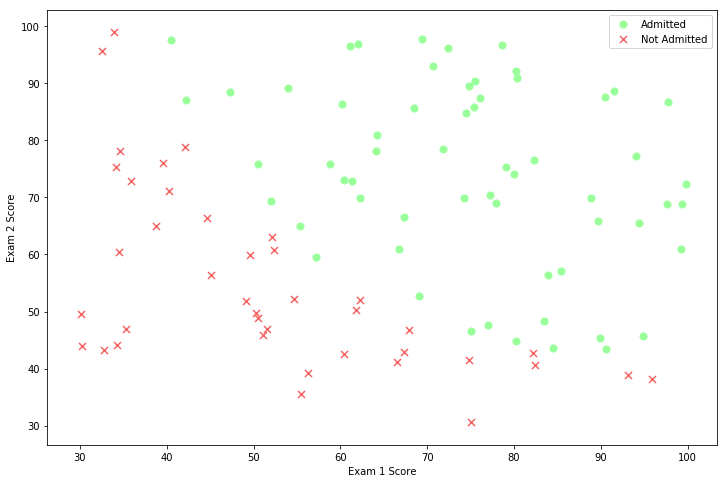

In [5]:
# Get values for positive (admitted) and negative (not admitted).
# We will plot these separately.
positive = df_raw[df_raw['Admitted'].isin([1])]
negative = df_raw[df_raw['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='#99FF99', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='#F66666', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

set_chart_theme(ax)

In [0]:
def sigmoid(z):
  return 1 / ( 1 + np.exp(-z) )

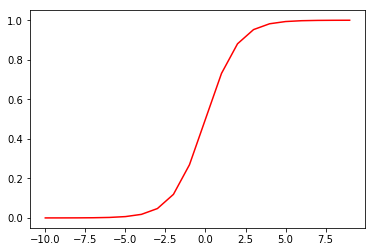

In [7]:
nums = np.arange(-10, 10, step = 1)

fig, ax = plt.subplots()
ax.plot(nums, sigmoid(nums), 'r')

set_chart_theme(ax)